# Import packages

In [1]:
import numpy as np  # mathematical functions
import pandas as pd  # data frame manipulation
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # visualization
from sklearn.cluster import KMeans #clustering by k-means
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# nếu bị báo lỗi ModuleNotFoundError: No module named 'yellowbrick' => nhập thêm dòng '!pip install yellowbrick'
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer #support to define k in k-means
from matplotlib.colors import ListedColormap #plot with colorful diagrams
sns.set()  # formating visualization

%matplotlib inline

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# import data
market_clean=pd.read_csv('clean_market_cluster.csv')
market_clean.info()
market_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Income               2236 non-null   float64
 3   Recency              2236 non-null   int64  
 4   MntWines             2236 non-null   int64  
 5   MntFruits            2236 non-null   int64  
 6   MntMeatProducts      2236 non-null   int64  
 7   MntFishProducts      2236 non-null   int64  
 8   MntSweetProducts     2236 non-null   int64  
 9   MntGoldProds         2236 non-null   int64  
 10  NumDealsPurchases    2236 non-null   int64  
 11  NumWebPurchases      2236 non-null   int64  
 12  NumCatalogPurchases  2236 non-null   int64  
 13  NumStorePurchases    2236 non-null   int64  
 14  NumWebVisitsMonth    2236 non-null   int64  
 15  AcceptedCmp3         2236 non-null   i

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Cus_weekday,Dt_Cus_month,Dt_Cus_quarter,Dt_Cus_year,Membership_day,Total_children,Total_Mnt,Total_purchases,Total_accepted_cpm,Living_Status,Family_size,Age,Cluster No.
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,4,2,2012,971,0,1617,25,1,Single,1,57,0
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,6,8,3,2014,125,2,27,6,0,Single,3,60,4
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2,8,3,2013,472,0,776,21,0,Together,2,49,2
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,3,10,4,2014,65,1,53,8,0,Together,3,30,4
4,5324,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,6,1,1,2014,321,1,422,19,0,Together,3,33,1


# Performing Statistical Analysis

The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns

## 1. Company Overview (period: 2012 - 2014)

### 1.1. Revenue

In [3]:
# analyze total purchased amount per customer
market_clean['Total_Mnt'].describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: Total_Mnt, dtype: float64

In [4]:
# Sum the total purchased amount of all customers
market_clean['Total_Mnt'].sum()

1354986

### 1.2. Products

In [5]:
# Sum total purchased amount per category per customer
Wines_total = market_clean['MntWines'].sum()
Fruits_total = market_clean['MntFruits'].sum()
Meat_total = market_clean['MntMeatProducts'].sum()
Fish_total = market_clean['MntFishProducts'].sum()
Sweet_total = market_clean['MntSweetProducts'].sum()
Gold_total = market_clean['MntGoldProds'].sum()

Text(0.5, 1.0, 'Total Revenue by Products')

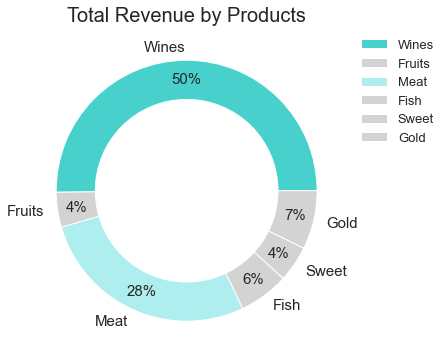

In [6]:
# Plot in pie chart
sum_1 = pd.DataFrame({'Total Amount': [Wines_total, Fruits_total, Meat_total, Fish_total, Sweet_total, Gold_total]},
                  index=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'])

plot = sum_1.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['mediumturquoise','lightgrey','paleturquoise','lightgrey','lightgrey','lightgrey'],
    figsize = (6,6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Total Revenue by Products", fontsize = 20)

### 1.3. Channels

In [7]:
# Sum total purchased amount per channel per customer
Deal_total = market_clean['NumDealsPurchases'].sum()
Web_total = market_clean['NumWebPurchases'].sum()
Catalog_total = market_clean['NumCatalogPurchases'].sum()
Store_total = market_clean['NumStorePurchases'].sum()

Text(0.5, 1.0, 'Total Purchases by Channels')

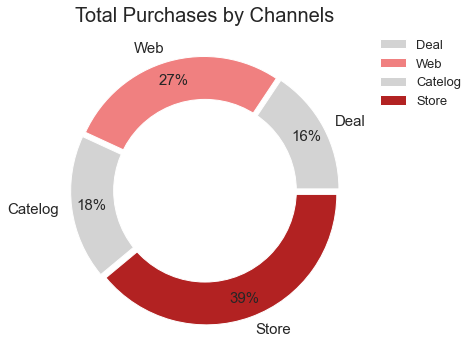

In [8]:
# Plot in pie chart
sum_2 = pd.DataFrame({'Total Amount': [Deal_total, Web_total, Catalog_total, Store_total]},
                  index=['Deal', 'Web', 'Catelog', 'Store'])

plot = sum_2.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['lightgrey','lightcoral','lightgrey','firebrick'],
    figsize = (6, 6),
    pctdistance=0.85,
    explode = (0.03,0.03,0.03,0.03)
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Total Purchases by Channels", fontsize = 20)

### 1.4. Newcomers

In [9]:
# count the number of newcomers per year
market_clean['Dt_Cus_year'].value_counts()

2013    1186
2014     556
2012     494
Name: Dt_Cus_year, dtype: int64

Text(0, 0.5, 'Total Number')

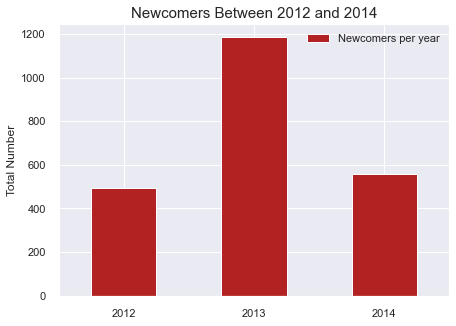

In [10]:
# plot in bar chart
sum_3 = pd.DataFrame({'Newcomers per year':[494,1186,556]},
                     index=['2012','2013','2014'])
sum_3.plot.bar(
    rot = 0,
    color="firebrick",
    figsize=(7,5)
)
plt.title("Newcomers Between 2012 and 2014", fontsize = 15)
plt.ylabel("Total Number")

### 1.5. Campaigns

Text(0, 0.5, 'Total Acceptances')

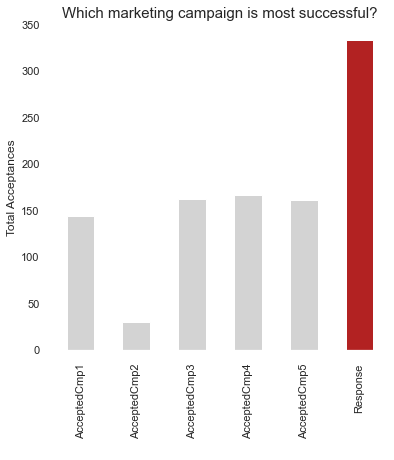

In [11]:
# plot the number of accepted tickets per campaign in bar chart
plt.axes().set_facecolor("white")
market_clean[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_index().plot.bar(
    figsize = (6,6),
    color = ('lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','firebrick')
)
plt.title("Which marketing campaign is most successful?",fontsize = 15)
plt.xlabel(" ");
plt.ylabel("Total Acceptances")

### 1.6. Complain

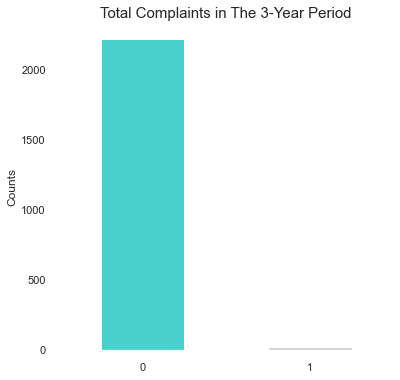

In [12]:
# plot the total number of complaints in 2 years in bar chart
plt.axes().set_facecolor("white")
market_clean['Complain'].value_counts().plot(
    kind = "bar",
    rot = 1,
    color = ('mediumturquoise','lightgrey'),
    figsize = (6,6)
)
plt.title("Total Complaints in The 3-Year Period", fontsize = 15)
plt.ylabel("Counts")
plt.show()

## 2. Customer Segmentation

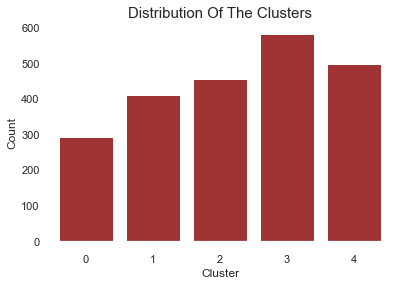

In [13]:
#Plotting countplot of clusters
plt.axes().set_facecolor("white")
pl = sns.countplot(
    x=market_clean['Cluster No.'],
    palette = ['firebrick']
)
pl.set_title("Distribution Of The Clusters", fontsize = 15)
pl.set_xlabel("Cluster")
pl.set_ylabel("Count")
plt.savefig('Cluster.png', bbox_inches='tight')
plt.show()

In [14]:
market_clean['Cluster No.'].value_counts(normalize=True)

3    0.260286
4    0.222272
2    0.203488
1    0.183810
0    0.130143
Name: Cluster No., dtype: float64

### 2.1. Income and Total Purchasing Amount

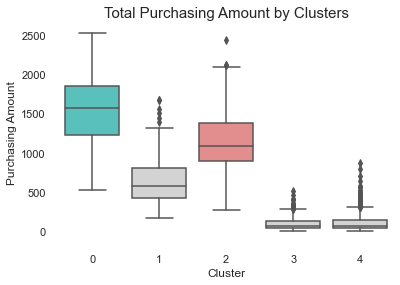

In [15]:
# plot the total purchasing amount per cluster in box chart
plt.figure()
plt.axes().set_facecolor("white")
pl = sns.boxplot(
    x=market_clean['Cluster No.'], 
    y=market_clean['Total_Mnt'],
    palette = ['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
)
pl.set_title("Total Purchasing Amount by Clusters", fontsize = 15)
pl.set_xlabel("Cluster")
pl.set_ylabel("Purchasing Amount")
plt.show()

<Figure size 432x288 with 0 Axes>

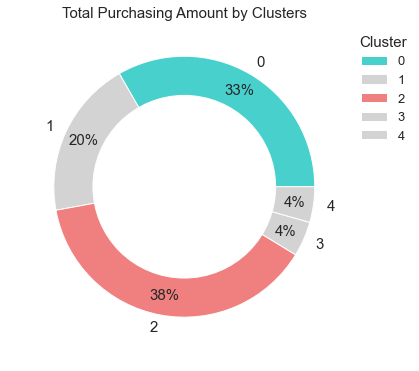

In [16]:
# plot the total purchasing amount per cluster in pie chart
plt.figure()
pl = market_clean.groupby(['Cluster No.']).sum().plot.pie( 
    y='Total_Mnt',
    autopct='%1.0f%%',
    fontsize = 15,
    colors = ['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey'],
    figsize = (6, 6),
    pctdistance=0.85
)
pl.set_title("Total Purchasing Amount by Clusters", fontsize = 15)
pl.set_xlabel(" ")
pl.set_ylabel(" ")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13, title = "Cluster", title_fontsize = 15)

<Figure size 432x288 with 0 Axes>

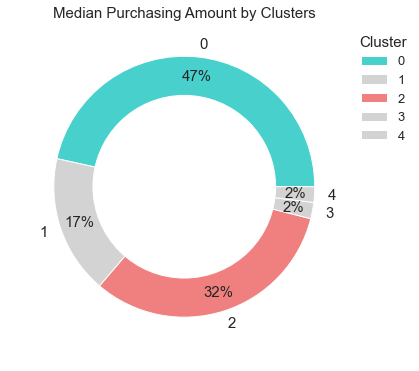

In [17]:
# plot the median purchasing amount per cluster in pie chart
plt.figure()
pl = market_clean.groupby(['Cluster No.']).median().plot.pie( 
    y='Total_Mnt',
    autopct='%1.0f%%',
    fontsize = 15,
    colors = ['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey'],
    figsize = (6, 6),
    pctdistance=0.85
)
pl.set_title("Median Purchasing Amount by Clusters", fontsize = 15)
pl.set_xlabel(" ")
pl.set_ylabel(" ")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13, title = "Cluster", title_fontsize = 15)

### 2.2. Accepted Campaigns

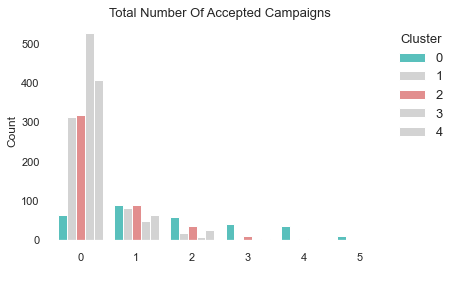

In [18]:
# plot the total accepted campaigns per cluster in sub-bar chart
plt.figure()
plt.axes().set_facecolor("white")
pl = sns.countplot(
    x=market_clean['Total_accepted_cpm'],
    hue=market_clean['Cluster No.'],
    palette = ['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
)
pl.set_title("Total Number Of Accepted Campaigns", fontsize = 13)
pl.set_xlabel(" ")
pl.set_ylabel("Count")
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13, title = "Cluster", title_fontsize = 13)
plt.show()

### 2.3. Purchasing Channels

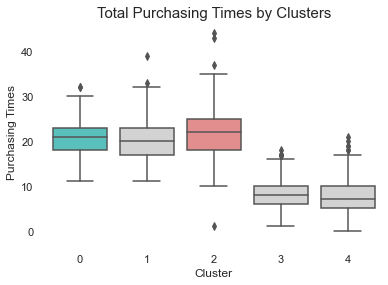

In [19]:
# plot the total number of purchasing times per cluster in box chart
plt.figure()
plt.axes().set_facecolor("white")
sns.boxplot(
    x=market_clean['Cluster No.'], 
    y=market_clean['Total_purchases'],
    palette = ['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
)
plt.title("Total Purchasing Times by Clusters", fontsize = 15)
plt.xlabel("Cluster")
plt.ylabel("Purchasing Times")
plt.show()

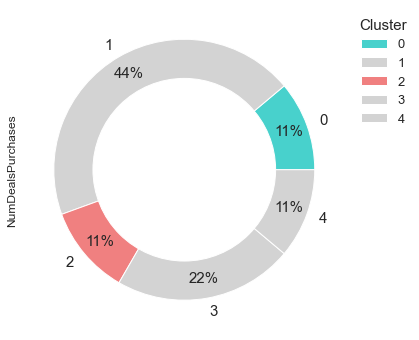

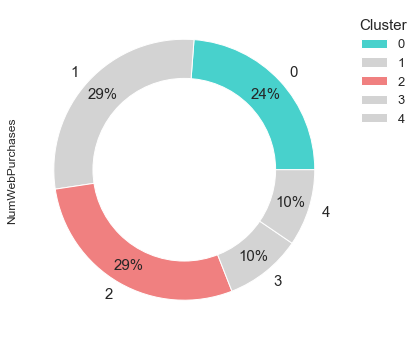

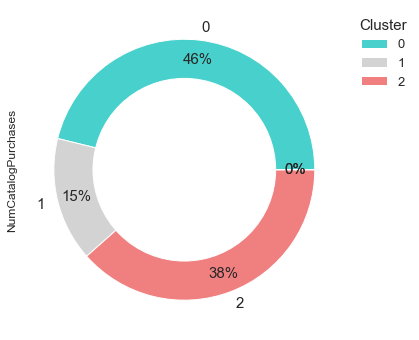

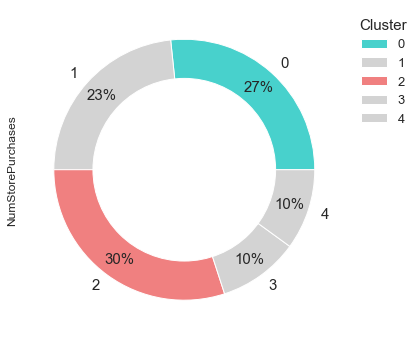

In [20]:
# plot the total number of purchasing times per cluster in pie chart
channels = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
for i in channels:
    market_clean.groupby(['Cluster No.']).median().plot.pie(
        y=i, 
        autopct='%1.0f%%',
        fontsize = 15,
        colors = ['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey'],
        figsize = (6, 6),
        pctdistance=0.85,
    )
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13, title = "Cluster", title_fontsize = 15)


### 2.4. Products

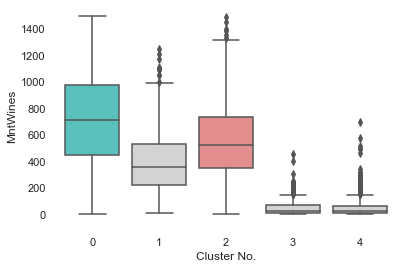

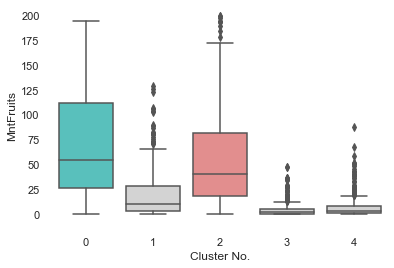

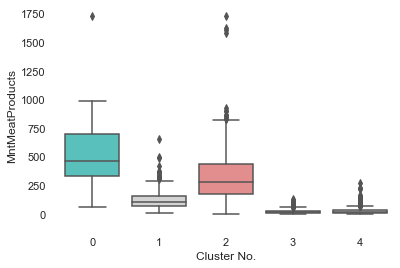

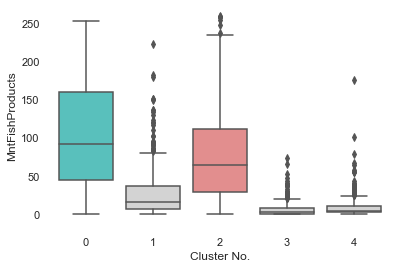

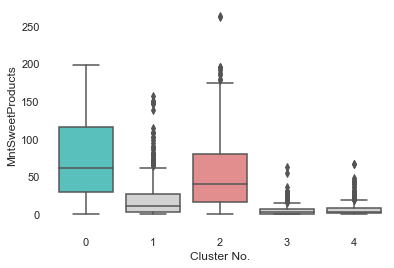

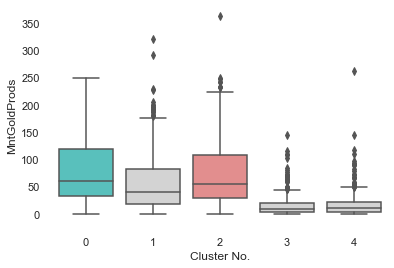

In [21]:
# plot the total amount of purchased products per cluster in box chart
products = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'] 
for i in products:
    plt.figure()
    plt.axes().set_facecolor("white")
    sns.boxplot(
        x=market_clean['Cluster No.'],
        y=market_clean[i],
        palette=['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
    )
    plt.show()

### 2.5. Recency

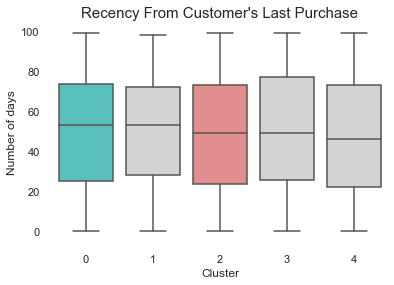

In [22]:
# plot the recency by cluster in box chart
plt.axes().set_facecolor("white")
sns.boxplot(
    x=market_clean['Cluster No.'], 
    y=market_clean['Recency'],
    palette=['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
)
plt.title("Recency From Customer's Last Purchase", fontsize = 15)
plt.xlabel("Cluster")
plt.ylabel("Number of days")
plt.show()

### 2.6. Number of Web Visits Last Month

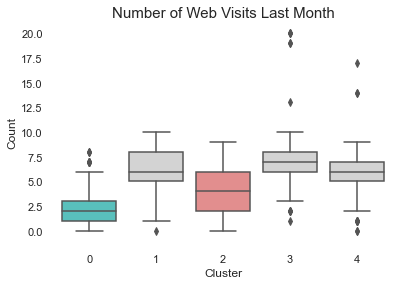

In [23]:
# plot the number of web visits per cluster in box chart
plt.axes().set_facecolor("white")
sns.boxplot(
    x=market_clean['Cluster No.'], 
    y=market_clean['NumWebVisitsMonth'],
    palette=['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
)
plt.title("Number of Web Visits Last Month", fontsize = 15)
plt.xlabel("Cluster")
plt.ylabel("Count")
sns.set(rc={"figure.figsize":(6, 5)})
plt.show()

### 2.7. Customer Personality

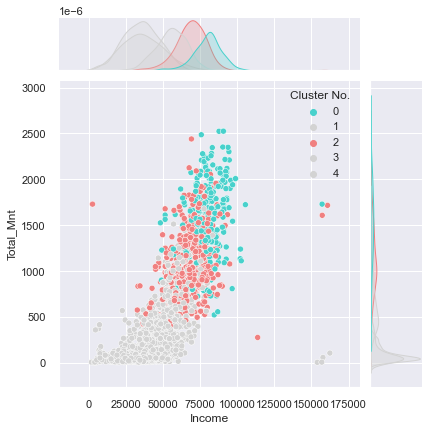

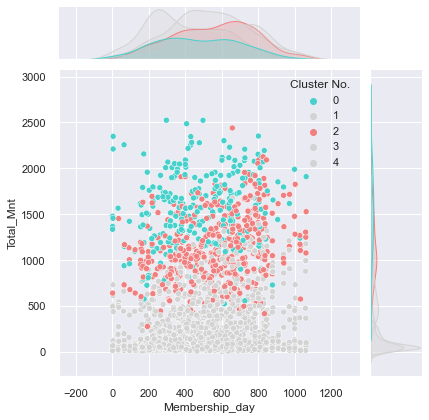

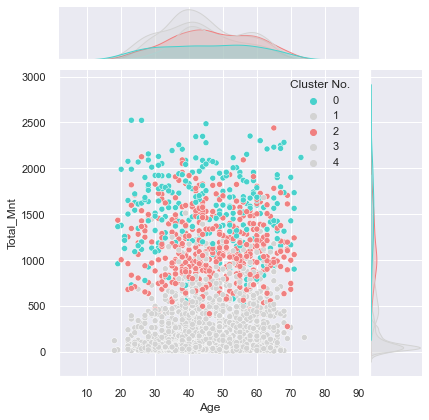

In [24]:
# Plot income, membership day and age per cluster in joint-scatter chart
cus_profile = ['Income','Membership_day','Age']
for i in cus_profile:
    sns.jointplot(
        x = market_clean[i], 
        y = market_clean['Total_Mnt'], 
        hue = market_clean['Cluster No.'],
        kind = "scatter",
        palette=['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
    )
    plt.show()

Text(0.5, 1.0, 'Median Age of Clusters')

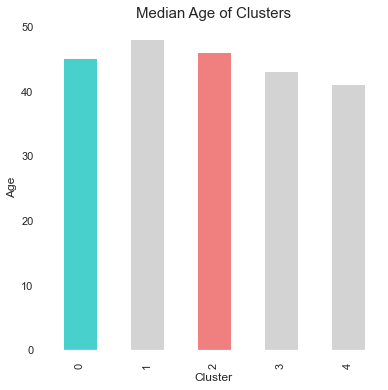

In [25]:
plt.axes().set_facecolor("white")
market_clean['Age'].groupby(market_clean['Cluster No.']).median().plot.bar(
    figsize = (6,6),
    color = ['mediumturquoise','lightgrey','lightcoral','lightgrey','lightgrey']
)
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Median Age of Clusters', fontsize = 15)

### 2.8. Cluster 0: Other Characteristics

In [26]:
cluster_0 = market_clean.loc[lambda market_clean: market_clean['Cluster No.'] == 0]
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 2233
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   291 non-null    int64  
 1   Education            291 non-null    object 
 2   Income               291 non-null    float64
 3   Recency              291 non-null    int64  
 4   MntWines             291 non-null    int64  
 5   MntFruits            291 non-null    int64  
 6   MntMeatProducts      291 non-null    int64  
 7   MntFishProducts      291 non-null    int64  
 8   MntSweetProducts     291 non-null    int64  
 9   MntGoldProds         291 non-null    int64  
 10  NumDealsPurchases    291 non-null    int64  
 11  NumWebPurchases      291 non-null    int64  
 12  NumCatalogPurchases  291 non-null    int64  
 13  NumStorePurchases    291 non-null    int64  
 14  NumWebVisitsMonth    291 non-null    int64  
 15  AcceptedCmp3         291 non-null    in

Text(0.5, 1.0, 'Median Purchased Amount of Products in Group 0')

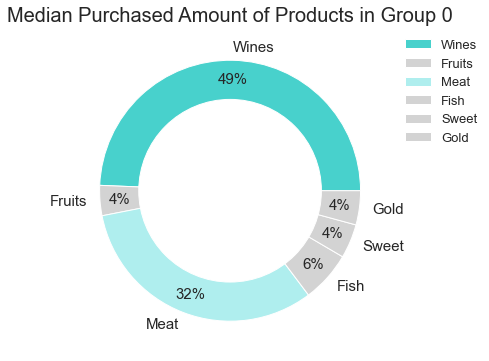

In [27]:
Wines_total_C0 = cluster_0['MntWines'].median()
Fruits_total_C0 = cluster_0['MntFruits'].median()
Meat_total_C0 = cluster_0['MntMeatProducts'].median()
Fish_total_C0 = cluster_0['MntFishProducts'].median()
Sweet_total_C0 = cluster_0['MntSweetProducts'].median()
Gold_total_C0 = cluster_0['MntGoldProds'].median()

sum_C0 = pd.DataFrame({'Total Amount': [Wines_total_C0, Fruits_total_C0, Meat_total_C0, Fish_total_C0, Sweet_total_C0, Gold_total_C0]},
                  index=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'])

plot = sum_C0.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['mediumturquoise','lightgrey','paleturquoise','lightgrey','lightgrey','lightgrey'],
    figsize = (6,6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Median Purchased Amount of Products in Group 0", fontsize = 20)


Text(0.5, 1.0, 'Median Multi-channel Purchases in Group 0')

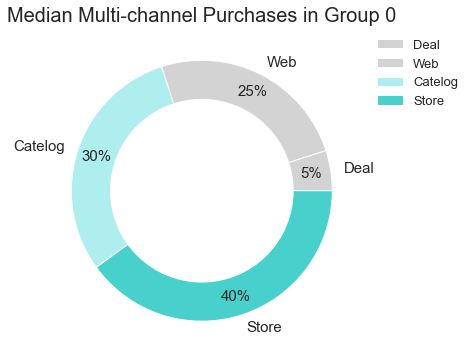

In [28]:
Deal_total_C0 = cluster_0['NumDealsPurchases'].median()
Web_total_C0 = cluster_0['NumWebPurchases'].median()
Catalog_total_C0 = cluster_0['NumCatalogPurchases'].median()
Store_total_C0 = cluster_0['NumStorePurchases'].median()

sum_C0_1 = pd.DataFrame({'Total Amount': [Deal_total_C0, Web_total_C0, Catalog_total_C0, Store_total_C0]},
                  index=['Deal', 'Web', 'Catelog', 'Store'])

plot = sum_C0_1.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['lightgrey','lightgrey','paleturquoise','mediumturquoise'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Median Multi-channel Purchases in Group 0", fontsize = 20)


In [29]:
cluster_0['Living_Status'].value_counts()

Single      164
Together    127
Name: Living_Status, dtype: int64

Text(0.5, 1.0, 'Living Status in Group 0')

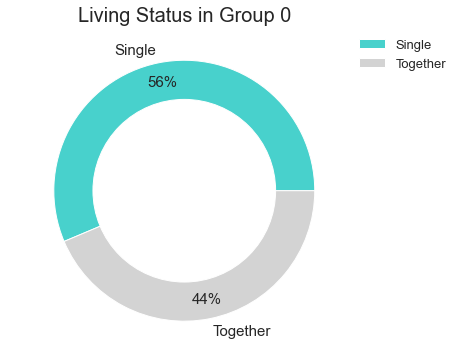

In [30]:
sum_C0_2 = pd.DataFrame({'Living_Status': [164,127]},
                  index=['Single', 'Together'])

plot = sum_C0_2.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['mediumturquoise','lightgrey'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Living Status in Group 0", fontsize = 20)


In [31]:
cluster_0['Total_children'].value_counts()

0    276
1     13
2      2
Name: Total_children, dtype: int64

Text(0.5, 1.0, 'Number of children in Group 0')

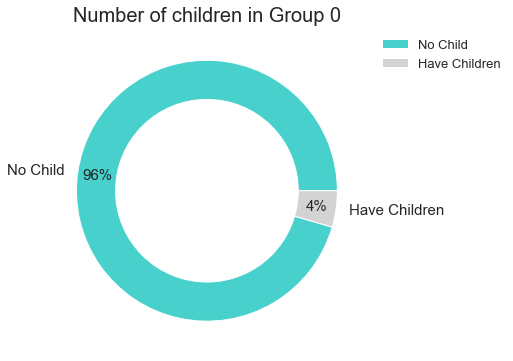

In [32]:
sum_C0_3 = pd.DataFrame({'Total Children': [276,13]},
                  index=['No Child', 'Have Children'])

plot = sum_C0_3.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['mediumturquoise','lightgrey'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Number of children in Group 0", fontsize = 20)


In [33]:
cluster_0['Education'].value_counts()

Graduation    165
PhD            59
Master         44
2n Cycle       23
Name: Education, dtype: int64

Text(0.5, 1.0, 'Education Level in Group 0')

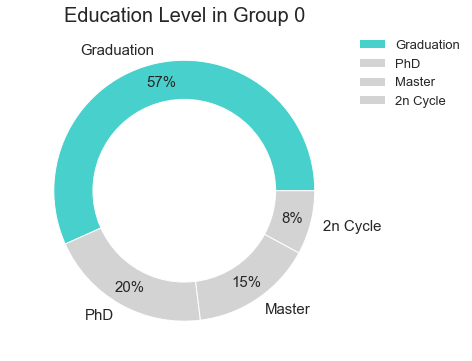

In [34]:
sum_C0_4 = pd.DataFrame({'Education': [165,59,44,23]},
                  index=['Graduation', 'PhD', 'Master', '2n Cycle'])

plot = sum_C0_4.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['mediumturquoise','lightgrey','lightgrey','lightgrey'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Education Level in Group 0", fontsize = 20)


### 2.9. Cluster 2: Other Characteristics

In [35]:
cluster_2 = market_clean.loc[lambda market_clean: market_clean['Cluster No.'] == 2]
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 2 to 2234
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   455 non-null    int64  
 1   Education            455 non-null    object 
 2   Income               455 non-null    float64
 3   Recency              455 non-null    int64  
 4   MntWines             455 non-null    int64  
 5   MntFruits            455 non-null    int64  
 6   MntMeatProducts      455 non-null    int64  
 7   MntFishProducts      455 non-null    int64  
 8   MntSweetProducts     455 non-null    int64  
 9   MntGoldProds         455 non-null    int64  
 10  NumDealsPurchases    455 non-null    int64  
 11  NumWebPurchases      455 non-null    int64  
 12  NumCatalogPurchases  455 non-null    int64  
 13  NumStorePurchases    455 non-null    int64  
 14  NumWebVisitsMonth    455 non-null    int64  
 15  AcceptedCmp3         455 non-null    in

Text(0.5, 1.0, 'Median Purchased Amount of Products in Group 2')

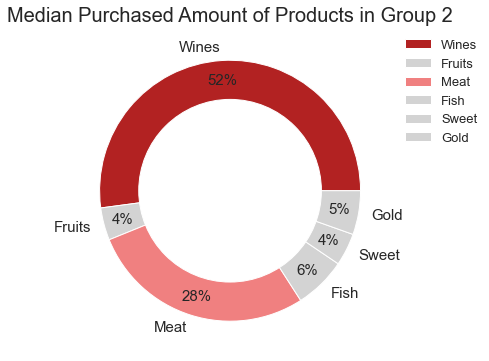

In [36]:
Wines_total_C2 = cluster_2['MntWines'].median()
Fruits_total_C2 = cluster_2['MntFruits'].median()
Meat_total_C2 = cluster_2['MntMeatProducts'].median()
Fish_total_C2 = cluster_2['MntFishProducts'].median()
Sweet_total_C2 = cluster_2['MntSweetProducts'].median()
Gold_total_C2 = cluster_2['MntGoldProds'].median()

sum_C2 = pd.DataFrame({'Total Amount': [Wines_total_C2, Fruits_total_C2, Meat_total_C2, Fish_total_C2, Sweet_total_C2, Gold_total_C2]},
                  index=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'])

plot = sum_C2.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['firebrick','lightgrey','lightcoral','lightgrey','lightgrey','lightgrey'],
    figsize = (6,6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Median Purchased Amount of Products in Group 2", fontsize = 20)


Text(0.5, 1.0, 'Median Multi-channel Purchases in Group 2')

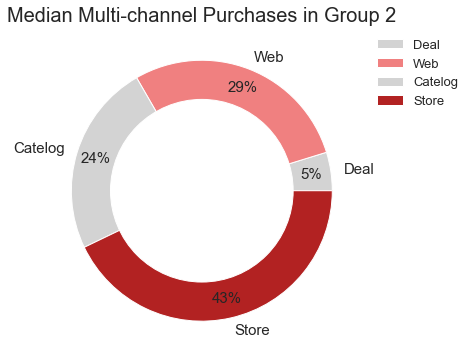

In [37]:
Deal_total_C2 = cluster_2['NumDealsPurchases'].median()
Web_total_C2 = cluster_2['NumWebPurchases'].median()
Catalog_total_C2 = cluster_2['NumCatalogPurchases'].median()
Store_total_C2 = cluster_2['NumStorePurchases'].median()

sum_C2_1 = pd.DataFrame({'Total Amount': [Deal_total_C2, Web_total_C2, Catalog_total_C2, Store_total_C2]},
                  index=['Deal', 'Web', 'Catelog', 'Store'])

plot = sum_C2_1.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['lightgrey','lightcoral','lightgrey','firebrick'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Median Multi-channel Purchases in Group 2", fontsize = 20)


In [38]:
cluster_2['Living_Status'].value_counts()

Together    297
Single      158
Name: Living_Status, dtype: int64

Text(0.5, 1.0, 'Living Status in Group 2')

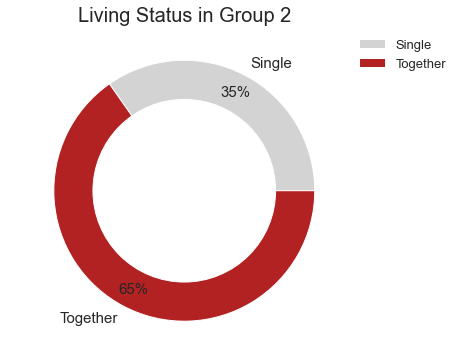

In [39]:
sum_C2_2 = pd.DataFrame({'Living_Status': [158,297]},
                  index=['Single', 'Together'])

plot = sum_C2_2.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['lightgrey','firebrick'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Living Status in Group 2", fontsize = 20)


In [40]:
cluster_2['Total_children'].value_counts()

1    236
0    211
2      6
3      2
Name: Total_children, dtype: int64

Text(0.5, 1.0, 'Number of children in Group 2')

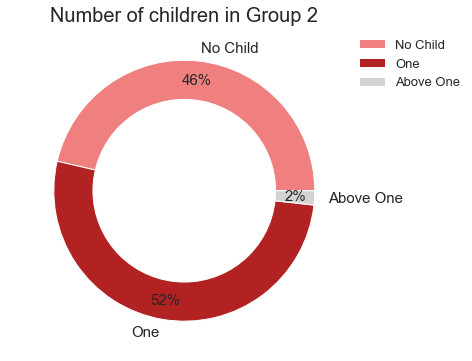

In [41]:
sum_C2_3 = pd.DataFrame({'Total Children': [211,236,8]},
                  index=['No Child', 'One', 'Above One'])

plot = sum_C2_3.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['lightcoral','firebrick','lightgrey'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Number of children in Group 2", fontsize = 20)


In [42]:
cluster_2['Education'].value_counts()

Graduation    236
PhD           113
Master         64
2n Cycle       41
Basic           1
Name: Education, dtype: int64

Text(0.5, 1.0, 'Education Level in Group 2')

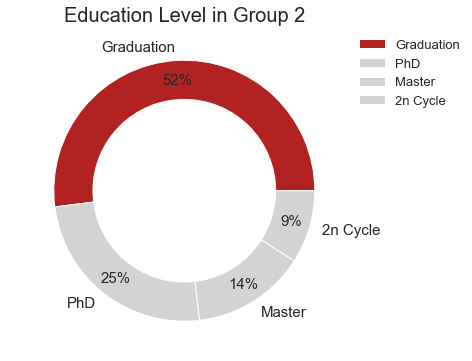

In [43]:
sum_C2_4 = pd.DataFrame({'Education': [236,113,64,41]},
                  index=['Graduation', 'PhD', 'Master', '2n Cycle'])

plot = sum_C2_4.plot.pie(
    subplots = True,
    ylabel = " ",
    autopct = '%1.0f%%',
    fontsize = 15,
    colors = ['firebrick','lightgrey','lightgrey','lightgrey'],
    figsize = (6, 6),
    pctdistance=0.85
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize = 13)
plt.title("Education Level in Group 2", fontsize = 20)

In [44]:
print(cluster_0['Income'].median(),'and',cluster_2['Income'].median())

80812.0 and 69267.0
